In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from tqdm import tqdm

## Данные

В этой лабораторной работе я буду использовать [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

In [12]:
df = pd.read_csv('dataset/star_classification.csv')

In [69]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [71]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [72]:
df['class'].nunique()

3

In [73]:
# sns.countplot(x=df['class'])
# plt.show()

In [74]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

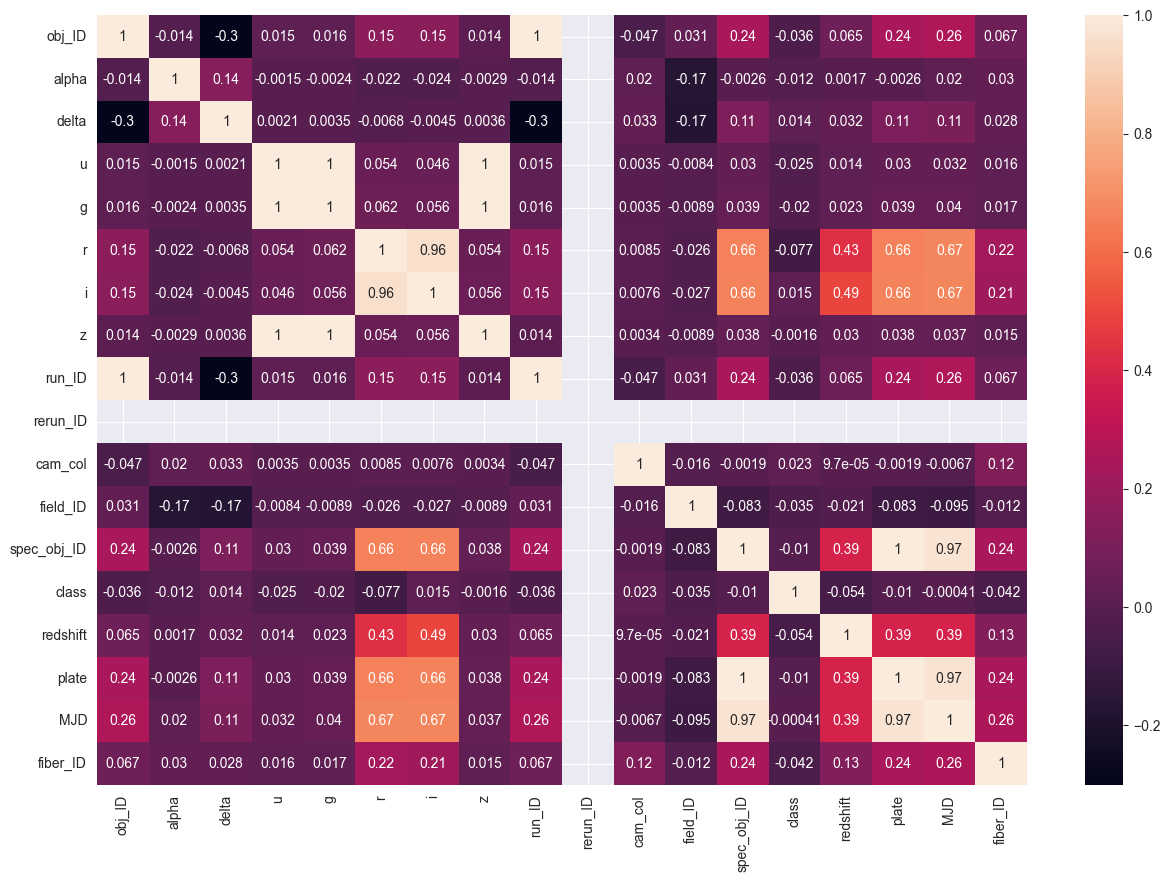

In [75]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

In [76]:
X = df[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']].to_numpy()
X

array([[2.387882e+01, 2.227530e+01, 2.039501e+01, ..., 1.879371e+01,
        6.347936e-01, 5.812000e+03],
       [2.477759e+01, 2.283188e+01, 2.258444e+01, ..., 2.161427e+01,
        7.791360e-01, 1.044500e+04],
       [2.526307e+01, 2.266389e+01, 2.060976e+01, ..., 1.894827e+01,
        6.441945e-01, 4.576000e+03],
       ...,
       [2.116916e+01, 1.926997e+01, 1.820428e+01, ..., 1.735221e+01,
        1.433656e-01, 2.764000e+03],
       [2.535039e+01, 2.163757e+01, 1.991386e+01, ..., 1.862482e+01,
        4.550396e-01, 6.751000e+03],
       [2.262171e+01, 2.179745e+01, 2.060115e+01, ..., 1.928075e+01,
        5.429442e-01, 7.410000e+03]])

In [77]:
y = df['class'].to_numpy()

In [78]:
rus = RandomUnderSampler(random_state=30)
X_res, y_res = rus.fit_resample(X, y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 52)

## Функции активаций и их производные

In [80]:
def identity(x): return x
def d_identity(x): return np.ones_like(x)

In [81]:
def relu(x): return np.maximum(0, x)
def d_relu(x): return (x > 0).astype(float)

In [82]:
def tanh(x): return np.tanh(x)
def d_tanh(x): return 1 - np.tanh(x) ** 2

In [83]:
activations = {
    'identity': (identity, d_identity),
    'relu': (relu, d_relu),
    'tanh': (tanh, d_tanh)
}

## Стандартное обучаемое преобразование
 Умножение на матрицу, добавление вектора и применение функции «активации». Преобразование пересчитывает градиент для входа и параметров. Поддерживаются три функции активации.

In [84]:
class LinearLayer:
    def __init__(self, input_dim, output_dim, activation="identity"):
        self.W = np.random.randn(input_dim, output_dim) * 0.1
        self.b = np.zeros(output_dim)
        self.activation = activation
        self._f, self.d_f = activations[activation]
        self.last_input = None
        self.last_linear = None

    def forward(self, X):
        self.last_input = X
        self.last_linear = X @ self.W + self.b
        return self._f(self.last_linear)

    def backward(self, grad_output):
        grad_Z = grad_output * self.d_f(self.last_linear)
        self.dW = self.last_input.T @ grad_Z / grad_Z.shape[0]
        self.db = grad_Z.mean(axis=0)
        return grad_Z @ self.W.T

    def get_params_grad(self):
        return [(self.W, self.dW), (self.b, self.db)]

## Модефикация матричного преобразования
 Скалярное произведение заменено на RBF ядро из SVM. То есть каждая координата вектора выхода получается как расстояние вектора входа с соответствующим вектором из матрицы параметров, а затем к нему применяется гауссова функция. Для данного преобразования также реализован пересчёт градиента.


In [85]:
class RBFLayer:
    def __init__(self, input_dim, output_dim, gamma=1.0):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.gamma = gamma
        self.centers = None
        self.last_input = None
        self.last_output = None
        self.last_diff = None

    def initialize_centers(self, data):
        idx = np.random.choice(data.shape[0], size=self.output_dim, replace=False)
        self.centers = data[idx].copy()

    def forward(self, X):
        diff = X[:, np.newaxis, :] - self.centers[np.newaxis, :, :]
        dist_sq = np.sum(diff**2, axis=2)             
        Y = np.exp(-self.gamma * dist_sq)             
        self.last_input = X
        self.last_output = Y
        self.last_diff = diff
        return Y

    def backward(self, grad_output):
        Y = self.last_output        
        diff = self.last_diff         
        batch_size = Y.shape[0]
        temp = grad_output * Y       
        grad_input = -2 * self.gamma * np.sum(diff * temp[:, :, np.newaxis], axis=1)
        self.dCenters = 2 * self.gamma * np.sum(diff * temp[:, :, np.newaxis], axis=0) / batch_size
        return grad_input

    def get_params_grad(self):
        return [(self.centers, self.dCenters)]

## SoftArgMaxCrossEntropy
Применяет к вектору композицию SoftArgMax преобразования и логарифма, для вычисления перекрёстной энтропии с целевым вектором. Данная функция также вычисляет градиент.


In [86]:
def softmax_crossentropy_loss(logits, y_true):
    logits_exp = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    probs = logits_exp / np.sum(logits_exp, axis=1, keepdims=True)
    batch_size = logits.shape[0]
    correct_probs = probs[np.arange(batch_size), y_true.astype(int)]
    loss = -np.mean(np.log(correct_probs + 1e-15))
    grad_logits = probs.copy()
    grad_logits[np.arange(batch_size), y_true.astype(int)] -= 1
    grad_logits /= batch_size
    return loss, grad_logits

## Адаптивный градиентный спуск

In [87]:
class RMSPropOptimizer:
    def __init__(self, lr=0.01, rho=0.9, epsilon=1e-8):
        self.lr = lr
        self.rho = rho
        self.epsilon = epsilon
        self.cache = {}

    def step(self, params_grads):
        for param, grad in params_grads:
            if grad is None:
                continue
            if id(param) not in self.cache:
                self.cache[id(param)] = np.zeros_like(param)
            self.cache[id(param)] = self.rho * self.cache[id(param)] + (1 - self.rho) * (grad ** 2)
            param -= self.lr * grad / (np.sqrt(self.cache[id(param)]) + self.epsilon)

## Обучение
 Для нескольких моделей с разным числом стандартных матричных преобразований постаралась подобрать хорошие гиперпараметры. На одном графике построила соответствующие кривые обучения. Замерила качество классификации на тестовой части построила зависимость от числа параметров и преобразований.

In [88]:
def train_model(layers, X_train, y_train, X_test, y_test, epochs=50, batch_size=64, lr=0.01):
    optimizer = RMSPropOptimizer(lr=lr)
    n_samples = X_train.shape[0]
    history_loss = []
    history_test_acc = []
    for epoch in range(epochs):
        batch_losses = []
        for i in range(0, n_samples, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            out = X_batch
            for layer in layers:
                out = layer.forward(out)
            loss, grad = softmax_crossentropy_loss(out, y_batch)
            batch_losses.append(loss)
            grad_back = grad
            for layer in reversed(layers):
                grad_back = layer.backward(grad_back)
            params_grads = []
            for layer in layers:
                params_grads.extend(layer.get_params_grad())
            optimizer.step(params_grads)
        history_loss.append(np.mean(batch_losses))
        out_test = X_test
        for layer in layers:
            out_test = layer.forward(out_test)
        preds = np.argmax(out_test, axis=1)
        test_acc = np.mean(preds == y_test)
        history_test_acc.append(test_acc)
    return history_loss, history_test_acc

In [89]:
def plot_learning_curves(losses, labels):        
    plt.figure(figsize=(10, 5))
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    plt.xlabel("Эпоха")
    plt.ylabel("Ошибка")
    plt.title("Кривые потерь")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [90]:
models = []

### Группа A
Только LinearLayer

In [91]:
models.append(("A1", [
    LinearLayer(X_train.shape[1], 32, "relu"),
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 2))

models.append(("A2", [
    LinearLayer(X_train.shape[1], 64, "relu"),
    LinearLayer(64, 32, "tanh"),
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 3))

models.append(("A3", [
    LinearLayer(X_train.shape[1], 128, "tanh"),
    LinearLayer(128, 64, "relu"),
    LinearLayer(64, 32, "tanh"),
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 4))

### Группа B

Только RBF (включая LinearLayer только как выходной)

In [92]:
B1 = RBFLayer(X_train.shape[1], 32)
B1.initialize_centers(X_train)
models.append(("B1", [
    B1,
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 2))

B2_1 = RBFLayer(X_train.shape[1], 64)
B2_1.initialize_centers(X_train)
X_b2 = B2_1.forward(X_train)
B2_2 = RBFLayer(64, 32)
B2_2.initialize_centers(X_b2)
models.append(("B2", [
    B2_1,
    B2_2,
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 3))

B3_1 = RBFLayer(X_train.shape[1], 128)
B3_1.initialize_centers(X_train)
X_b3_1 = B3_1.forward(X_train)
B3_2 = RBFLayer(128, 64)
B3_2.initialize_centers(X_b3_1)
X_b3_2 = B3_2.forward(X_b3_1)
B3_3 = RBFLayer(64, 32)
B3_3.initialize_centers(X_b3_2)
models.append(("B3", [
    B3_1,
    B3_2,
    B3_3,
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 4))

### Группа C
RBF + Linear

In [93]:
C1 = RBFLayer(X_train.shape[1], 32)
C1.initialize_centers(X_train)
models.append(("C1", [
    C1,
    LinearLayer(32, 64, "relu"),
    LinearLayer(64, len(np.unique(y_train)), "identity")
], 3))

C2 = RBFLayer(X_train.shape[1], 64)
C2.initialize_centers(X_train)
models.append(("C2", [
    C2,
    LinearLayer(64, 64, "relu"),
    LinearLayer(64, 32, "tanh"),
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 4))

C3 = RBFLayer(X_train.shape[1], 128)
C3.initialize_centers(X_train)
models.append(("C3", [
    C3,
    LinearLayer(128, 128, "tanh"),
    LinearLayer(128, 64, "relu"),
    LinearLayer(64, 32, "tanh"),
    LinearLayer(32, len(np.unique(y_train)), "identity")
], 5))

In [94]:
results = {"A": [], "B": [], "C": []}
loss_groups = {"A": [], "B": [], "C": []}

In [95]:
for name, layers, num_layers in tqdm(models, desc="Обучение моделей"):
    loss_hist, acc_hist = train_model(layers, X_train, y_train, X_test, y_test, epochs=40, lr=0.01)
    
    final_acc = acc_hist[-1]
    group = name[0]
    
    results[group].append({
        "label": name,
        "layers": num_layers,
        "accuracy": final_acc
    })
    loss_groups[group].append((loss_hist, name))

Обучение моделей: 100%|██████████| 9/9 [06:54<00:00, 46.01s/it]


In [96]:
def plot_loss_group(loss_list, group_name):
    plt.figure(figsize=(8, 5))
    for loss_hist, label in loss_list:
        plt.plot(loss_hist, label=label)
    plt.xlabel("Эпоха")
    plt.ylabel("Loss")
    plt.title(f"Группа {group_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

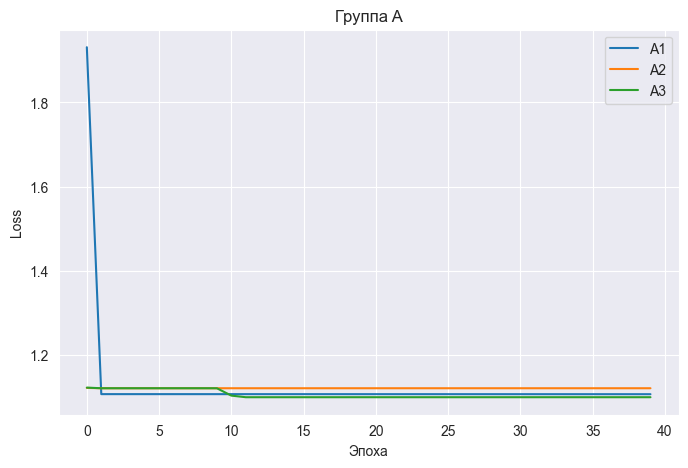

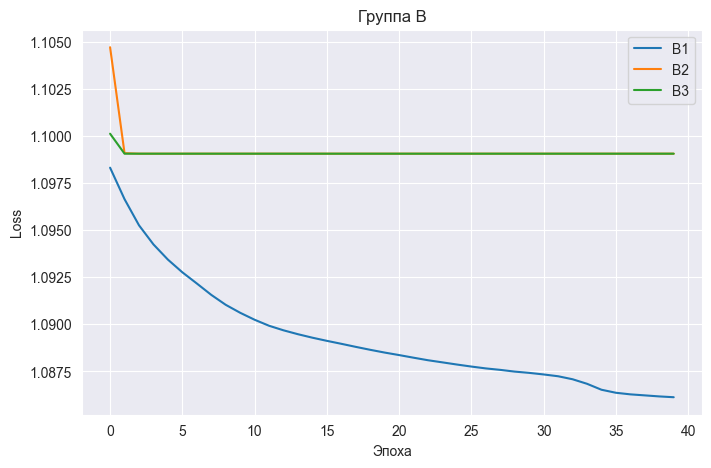

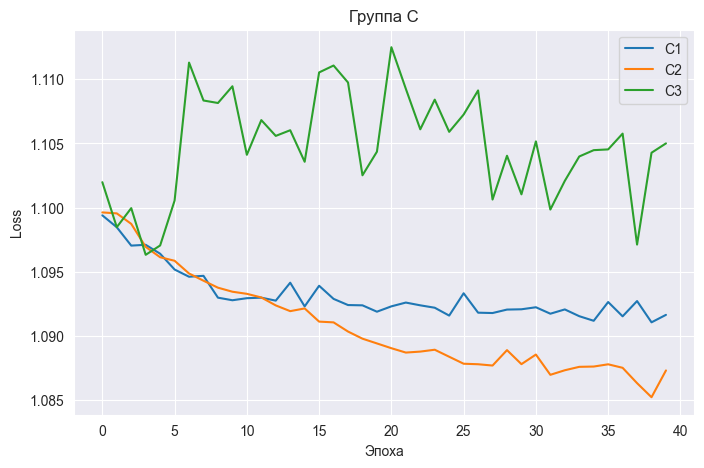

In [97]:
for group in ["A", "B", "C"]:
    plot_loss_group(loss_groups[group], group)

In [98]:
def plot_acc_vs_layers(stats, group_name):
    layers = [d["layers"] for d in stats]
    accs = [d["accuracy"] for d in stats]

    plt.figure(figsize=(6, 4))
    plt.plot(layers, accs, marker='o')
    plt.xlabel("Слои")
    plt.ylabel("Точность")
    plt.title(f"Группа {group_name}")
    plt.grid(True)
    plt.show()

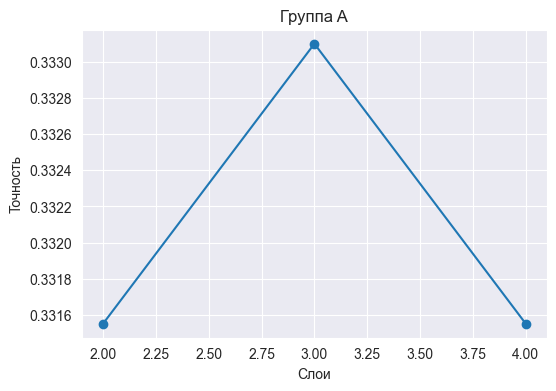

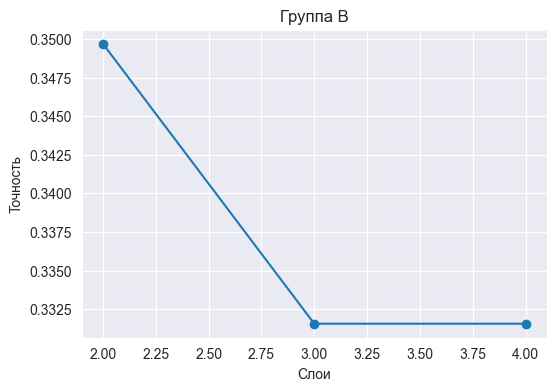

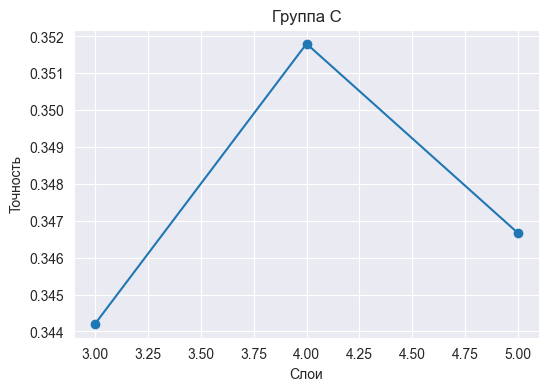

In [99]:
for group in ["A", "B", "C"]:
    plot_acc_vs_layers(results[group], group)